In [ ]:
#!pip install pandas numpy matplotlib tensorflow scikit_learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

Read dataset

In [2]:
#Can change to different stock "MSN", "PNJ", "VIC"
stock = "FPT" 

stock_data = pd.read_csv(f"./Data/{stock}.csv")

stock_data.head()


,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,FPT,12/25/2018 9:15,30.89,30.89,30.89,30.89,35410,0
1,FPT,12/25/2018 9:16,30.81,30.81,30.81,30.81,190,0
2,FPT,12/25/2018 9:17,30.74,30.81,30.74,30.74,1120,0
3,FPT,12/25/2018 9:18,30.74,30.74,30.74,30.74,2120,0
4,FPT,12/25/2018 9:19,30.74,30.74,30.74,30.74,22500,0


In [3]:
print(stock_data.describe())

               Open          High           Low         Close        Volume  \
count  97406.000000  97406.000000  97406.000000  97406.000000  9.740600e+04   
mean      45.071630     45.090138     45.051430     45.071631  8.044173e+03   
std        6.359803      6.364950      6.354245      6.359799  1.753203e+04   
min       30.250000     30.250000     30.220000     30.250000  1.000000e+01   
25%       39.740000     39.740000     39.700000     39.740000  7.500000e+02   
50%       46.950000     46.950000     46.950000     46.950000  2.960000e+03   
75%       49.200000     49.250000     49.170000     49.200000  8.960000e+03   
max       58.400000     58.500000     58.400000     58.400000  1.255930e+06   

       Open Interest  
count        97406.0  
mean             0.0  
std              0.0  
min              0.0  
25%              0.0  
50%              0.0  
75%              0.0  
max              0.0  


In [4]:
#To check the missing value
print(stock_data.isna().sum())
#No missing value

Ticker           0
Date/Time        0
Open             0
High             0
Low              0
Close            0
Volume           0
Open Interest    0
dtype: int64


In [5]:
# Select the relevant features: Open, High, Low, Close, and Volume
features = stock_data[['Open', 'High', 'Low', 'Close', 'Volume']].values

Plotting data

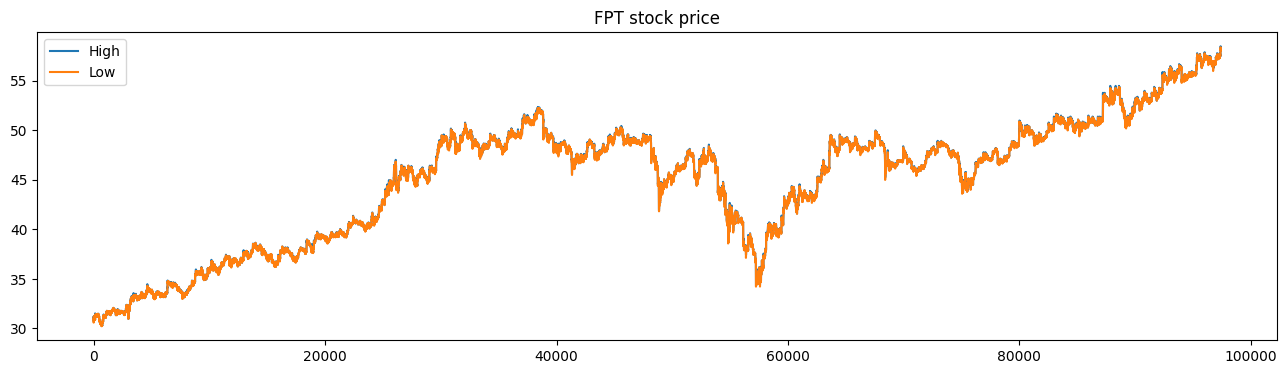

In [6]:
#plot the highest and lowest value
stock_data[["High", "Low"]].plot(figsize=(16, 4), legend=True)
plt.legend(["High", "Low"])
plt.title(f"{stock} stock price")
plt.show()

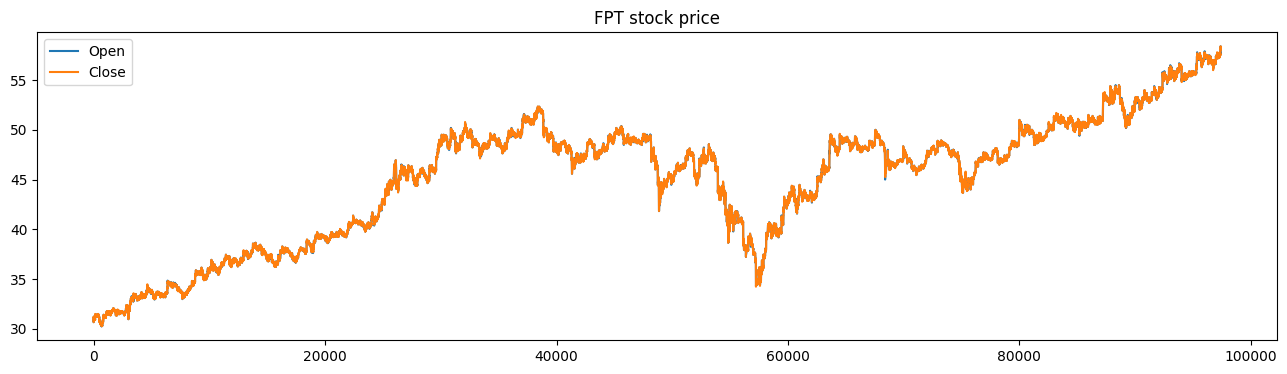

In [7]:
#plot the open and close value
stock_data[["Open", "Close"]].plot(figsize=(16, 4), legend=True)
plt.legend(["Open", "Close"])
plt.title(f"{stock} stock price")
plt.show()

Scaling data

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
features = scaler.fit_transform(features)

Create inputs and outputs for the model

In [9]:
# Function to create scaled sequences with individual window scaling
def create_scaled_sequences_with_scalers(data, time_steps=500):
    X, y = [], [],
    for i in range(len(data)):
        end_ix = i + time_steps
        if(end_ix > len(data) -1 ): break

        #Extract the window
        window_data = data[i :end_ix]
        # Append the scaled data
        X.append(window_data)
        y.append(data[end_ix, 3])  # Use the Close price (index 3) as the target

    return np.array(X), np.array(y)

In [10]:
# Apply the function to create scaled windows
time_steps = 500
X_scaled, y_scaled= create_scaled_sequences_with_scalers(features, time_steps)

Splitting into train and test sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.2, shuffle=False)

Create time-series model

In [12]:
model = Sequential()

# Add an LSTM layer with 50 units
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_scaled.shape[1], X_scaled.shape[2])))
model.add(Dropout(0.2))

# Add a second LSTM layer
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Add a Dense layer
model.add(Dense(units=25))

# Output layer to predict the closing price
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 79s 31ms/step - loss: 0.0042
Epoch 2/10
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 80s 31ms/step - loss: 3.1583e-04
Epoch 3/10
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - loss: 3.2292e-04
Epoch 4/10
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - loss: 3.0250e-04
Epoch 5/10
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - loss: 2.9780e-04
Epoch 6/10
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 85s 32ms/step - loss: 3.0013e-04
Epoch 7/10
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 80s 31ms/step - loss: 2.9653e-04
Epoch 8/10
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - loss: 2.9387e-04
Epoch 9/10
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 75s 31ms/step - loss: 2.9514e-04
Epoch 10/10
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step - loss: 2.8100e-04


Result

In [13]:
pred = model.predict(X_test)


606/606 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step


Rescale the predictions and the real prices

In [14]:
pred = pred.flatten()
predicted_close_price_rescaled = []
real_rescaled = []

for i in range(len(pred)):

    # Create a dummy array with 5 features, all zeros
    dummy_data1 = np.zeros((1, 5))
    dummy_data2 = np.zeros((1, 5))
    # Place the predicted close price into the 4th column (index 3, where Close price is)
    dummy_data1[0, 3] = pred[i]
    dummy_data2[0, 3] = y_test[i]
    # Inverse transform the dummy array (scaler expects the same number of features as the original data)
    original_scale1 = scaler.inverse_transform(dummy_data1)
    original_scale2 = scaler.inverse_transform(dummy_data2)
    # Extract the rescaled close price (from the 4th column, index 3)
    predicted_close_price_rescaled.append(original_scale1[0, 3])
    real_rescaled.append(original_scale2[0, 3])

pred = np.array(predicted_close_price_rescaled)
real = np.array(real_rescaled)

Compare the predictions and real prices

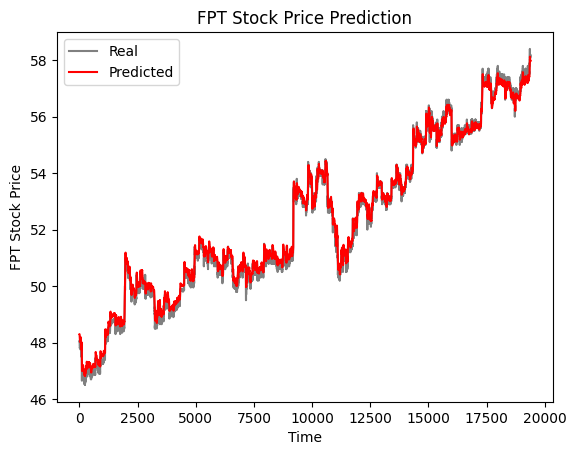

In [15]:
def plot_predictions(test, predicted):
    plt.plot(test, color="gray", label="Real")
    plt.plot(predicted, color="red", label="Predicted")
    plt.title(f"{stock} Stock Price Prediction")
    plt.xlabel("Time")
    plt.ylabel(f"{stock} Stock Price")
    plt.legend()
    plt.show()


plot_predictions(real,pred)

In [16]:
mse = mean_squared_error(real, pred)
print(mse)

0.028328015099896735


Save the model

In [17]:
model.save("stock_price_prediction_model.h5")